In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

target_names = iris.target_names
print(target_names)


#1 Standardized data
X_std = StandardScaler().fit_transform(X)

#2 Compute mean of data
mean_vec = np.mean(X, axis=0)

mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
#print('Covariance matrix \n%s' %cov_mat)

#3 Compute covariance matrix
#cov_mat2 = np.cov(X_std.T)

#print(cov_mat2)

cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
#print('Eigenvalues in descending order:')
#for i in eig_pairs:
#    print(i[0])
    
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))
#print('Matrix W:\n', matrix_w)

X_rr = X_std.dot(matrix_w)
print(X_rr.shape)
colors = ['navy', 'turquoise', 'darkorange']
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    #print(i)
        plt.scatter(X_rr[y == i, 0], X_rr[y == i, 1], color=color, 
                label=target_name)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.savefig('PREDI3.png', format='png', dpi=1200)
    plt.show()



['setosa' 'versicolor' 'virginica']
(150, 2)


<Figure size 800x600 with 1 Axes>

No handles with labels found to put in legend.


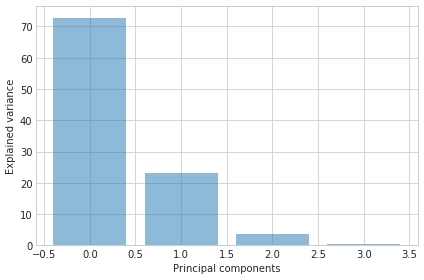

In [3]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center')
    plt.ylabel('Explained variance')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()